In [1]:
import os 
import sys
sys.path.append("/home/martin/Work/Qutip/modules")
import Opt
import Tomomod as Tm
import Utility as Ut

In [2]:
dictionary = {'P1': 0.1, 'P2': 0.2, 't1': 0., 't2': 17.}
dictionary['P2']

0.2

In [3]:
if 'Hej' in dictionary:
    print(dictionary['Hej'])
if 'P1' in dictionary:
    print(dictionary['P1'])

0.1


In [4]:
dict2 = {'Method': 't2', 'omega': 0.7}
if dict2['Method'] == 't2':
    print('Success!')

Success!


In [5]:
dim = 3
Op = 0.5 * (Tm.PauliN(0,dim) + Tm.PauliN(3,dim))
l0 = 0.
l3 = 1 - l0
#var   = {'t2': 17.}
var = {'P1': 1.}
#param = {'P1': 0.1, 'P2': 0.2, 't1': 0.}
param = {'t1': 0.}
method = {'Method': 'SP'}
target = {'Target': 'S3'}
lagrange = {'l0': l0, 'l3': l3}

In [6]:
lagrange

{'l0': 0.0, 'l3': 1.0}

In [7]:
Opt_test = Opt.Optimizer(Op, dim, var, param, method, target, lagrange)

In [8]:
print(Opt_test.O)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [9]:
print(Opt_test.varlist)

{'P1': 1.0}


In [10]:
print(Opt_test.paramlist)

{'t1': 0.0}


In [11]:
print(Opt_test.method)

{'Method': 'SP'}


In [12]:
print(Opt_test.target)

{'Target': 'S3'}


In [13]:
print(Opt_test.lagrange)

{'l0': 0.0, 'l3': 1.0}


In [14]:
Opt_test.run_optimization()


Impulse operator


In [15]:
print(Opt_test.opt)

      fun: -0.9999999999999996
 hess_inv: array([[1.40627999]])
      jac: array([-2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([-4.57850517e-08])


In [16]:
print(Opt_test.opt.x[0])

-4.578505173269084e-08


In [17]:
#Verify optimization result
Pstar3D = Opt_test.opt.x[0] #2.88325035
print(Op)
Op = Opt_test.O
print(Op)
P = Tm.Pstar()
T3 = 0.
U3_verify = Ut.ImpulseEvolutionOperator(Pstar3D, dim=3, name='SP verify S3')
#U3_verify = Ut.FullEvolutionOperator(P, dim=3, name='SP verify S3')
U3_verify.print_pulse_operator_info()

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Impulse operator
# Evolution operator info for : SP verify S3
Dimensions: 3
Operator type: pulse
Reprenting even states
Pulse strength: -4.578505173269084e-08 (au)


In [18]:
#Evolve backwards and take projections
U3_BW = Ut.UBWO(U3_verify.Up, Op)
for i in range(4):
    print(i, Ut.Proj(U3_BW, Tm.PauliN(i,dim)))
    
print(l0*Ut.Proj(U3_BW, Tm.PauliN(0,dim))**2. + l3*Ut.Proj(U3_BW,Tm.PauliN(3,dim))**2.)

0 0.9999999999999998
1 0.0
2 2.7300930140704314e-08
3 0.9999999999999998
0.9999999999999996


In [19]:
l1 = 1. - l0
var = {'t1': 0., 'P1': Pstar3D}
param = {'P1': Pstar3D, 'B': 1.}
method = {'Method': 'SP'}
target = {'Target': 'S1'}
lagrange = {'l0': 0., 'l1': 1. - l0}

In [20]:
Opt_testS1_SP = Opt.Optimizer(Op, dim, var, param, method, target, lagrange)

In [21]:
Opt_testS1_SP.run_optimization()

In [22]:
print(Opt_testS1_SP.opt)

      fun: 1.0
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.])


In [23]:
print(Opt_testS1_SP.opt.x[0])
print(Opt_testS1_SP.paramlist['P1'])
print(Opt_testS1_SP.paramlist['B'])

0.0
-4.578505173269084e-08
1.0


In [24]:
#Verify optimization result
P = Opt_testS1_SP.paramlist['P1']
B = Opt_testS1_SP.paramlist['B']
T = Opt_testS1_SP.opt.x[0]

In [25]:
# Create evolution operator
U1_verify = Ut.FullEvolutionOperator(P, B, T, dim=dim, name='SP verify S1')
U1_verify.print_full_operator_info()

# Evolution operator info for : SP verify S1
Dimensions: 3
Operator type: full
Reprenting even states
Pulse strength: -4.578505173269084e-08 (au)
Rotational constant: 1.0 (au)
Time delay: 0.0 (au)


In [26]:
#Evolve backwards and take projections
U1_BW = Ut.UBWO(U1_verify.U, Op)
for i in range(4):
    print(i, Ut.Proj(U1_BW, Tm.PauliN(i,dim)))
    
print(l0*(Ut.Proj(U1_BW, Tm.PauliN(0,dim)) - 1.)**2. + l1*(Ut.Proj(U1_BW,Tm.PauliN(1,dim)-1.)**2.))

0 0.9999999999999998
1 0.0
2 2.7300930140704314e-08
3 0.9999999999999998
0.9999999999999996


Propagate at various times

In [27]:
import numpy as np
t0 = 0.
dt = 0.01
nt = 500
U1_time = Ut.FullEvolutionOperator(P, B, t0, dim=dim, name="S1 SP time")
U1_T = Ut.FullEvolutionOperator(P, B, T, dim=dim, name="S1 SP time")
U_BW_T = Ut.UBWO(U1_T.U, Op)
S1_T = Ut.Proj(U_BW_T, Tm.PauliN(1, dim))
time = np.zeros(nt)
time_comp = np.zeros(nt)
S1   = np.zeros(nt)
S1_comp = np.zeros(nt)
print("T =", T)
for i in range(nt):
    t = t0 + float(i)*dt
    time[i] = t
    time_comp[i] = T
    U1_time.update_full_operator(which='t', value=t)
    U_BW = Ut.UBWO(U1_time.U, Op)
    S1[i] = Ut.Proj(U_BW, Tm.PauliN(1, dim))
    S1_comp[i] = S1_T

T = 0.0


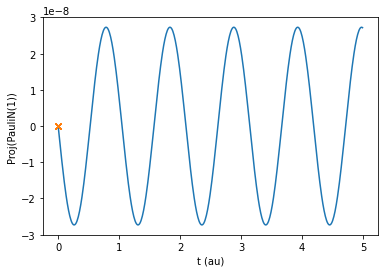

In [28]:
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(time, S1, time_comp, S1_comp, 'x')
ax.set_xlabel('t (au)')
ax.set_ylabel('Proj(PauliN(1))')
plt.show()

Optimizing S2

In [29]:
l2 = 1. - l0
var = {'t1': 1., 'P1': Pstar3D}
param = {'P1': Pstar3D, 'B': 1.}
method = {'Method': 'SP'}
target = {'Target': 'S2'}
lagrange = {'l0': 0., 'l2': 1. - l0}

In [30]:
Opt_testS2_SP = Opt.Optimizer(Op, dim, var, param, method, target, lagrange)

In [31]:
Opt_testS2_SP.run_optimization()

In [32]:
print(Opt_testS2_SP.opt)

      fun: 0.9999999475729171
 hess_inv: array([[1]])
      jac: array([-8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1.])


In [33]:
print(Opt_testS2_SP.opt.x[0])
print(Opt_testS2_SP.paramlist['P1'])
print(Opt_testS2_SP.paramlist['B'])

1.0
-4.578505173269084e-08
1.0


Verifying the optimization results for S2

In [34]:
P = Opt_testS2_SP.paramlist['P1']
B = Opt_testS2_SP.paramlist['B']
T = Opt_testS2_SP.opt.x[0]

In [35]:
# Create evolution operator
U2_verify = Ut.FullEvolutionOperator(P, B, T, dim=dim, name='SP verify S2')
U2_verify.print_full_operator_info()

# Evolution operator info for : SP verify S2
Dimensions: 3
Operator type: full
Reprenting even states
Pulse strength: -4.578505173269084e-08 (au)
Rotational constant: 1.0 (au)
Time delay: 1.0 (au)


In [36]:
#Evolve backwards and take projections
U2_BW = Ut.UBWO(U2_verify.U, Op)
for i in range(4):
    print(i, Ut.Proj(U2_BW, Tm.PauliN(i,dim)))
    
print(l0*(Ut.Proj(U2_BW, Tm.PauliN(0,dim)) - 1.)**2. + l2*(Ut.Proj(U2_BW,Tm.PauliN(2,dim) - 1.)**2.))

0 0.9999999999999998
1 7.62830339662176e-09
2 2.621354180260093e-08
3 0.9999999999999998
0.9999999475729167


Propagate at various times

In [37]:
U2_time = Ut.FullEvolutionOperator(P, B, t0, dim=dim, name="S2 SP time")
U2_T = Ut.FullEvolutionOperator(P, B, T, dim=dim, name="S2 SP time")
U_BW_T = Ut.UBWO(U2_T.U, Op)
S2_T = Ut.Proj(U_BW_T, Tm.PauliN(2, dim))
S2   = np.zeros(nt)
S2_comp = np.zeros(nt)
print("T =", T)
for i in range(nt):
    t = t0 + float(i)*dt
    time[i] = t
    time_comp[i] = T
    U2_time.update_full_operator(which='t', value=t)
    U_BW = Ut.UBWO(U2_time.U, Op)
    S2[i] = Ut.Proj(U_BW, Tm.PauliN(2, dim))
    S2_comp[i] = S2_T

T = 1.0


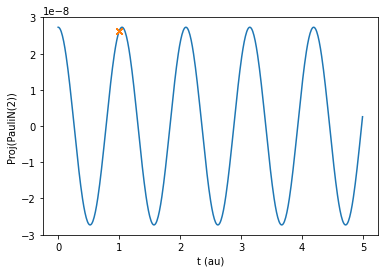

In [38]:
fig, ax = plt.subplots()
ax.plot(time, S2, time_comp, S2_comp, 'x')
ax.set_xlabel('t (au)')
ax.set_ylabel('Proj(PauliN(2))')
plt.show()

In [39]:
l0 = 0.
l3 = 1 - l0
var   = {'t2': 1.}
#var = {'P1': 1.}
param = {'P1': Pstar3D/2., 'P2': Pstar3D/2., 't1': 0., 'B': 1.}
#param = {'t1': 0.}
method = {'Method': 'DP_t2'}
target = {'Target': 'S3'}
lagrange = {'l0': l0, 'l3': l3}

In [40]:
Opt_testS3_DP = Opt.Optimizer(Op, dim, var, param, method, target, lagrange)

In [41]:
Opt_testS3_DP.run_optimization()

In [42]:
print(Opt_testS3_DP.opt)

      fun: 1.0
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1.])


In [43]:
print(Opt_testS3_DP.opt.x[0])
print(Opt_testS3_DP.paramlist['P1'], Opt_testS3_DP.paramlist['P2'])
print(Opt_testS3_DP.paramlist['B'])

1.0
-2.289252586634542e-08 -2.289252586634542e-08
1.0


In [44]:
P1 = Opt_testS3_DP.paramlist['P1']
P2 = Opt_testS3_DP.paramlist['P2']
B = Opt_testS3_DP.paramlist['B']
T1 = 0.
T2 = Opt_testS3_DP.opt.x[0]

In [45]:
# Create evolution operator
P3 = Ut.Pulses([P1, P2], [T1, T2])
U3_DP_verify = Ut.EvolutionOperators(P3, B, dim=dim, name='DP verify S3')
#U3_DP_verify.print_full_operator_info()

In [47]:
#Evolve backwards and take projections
U3_BW = Ut.UBWO(U3_DP_verify.U, Op)
for i in range(4):
    print(i, Ut.Proj(U3_BW, Tm.PauliN(i,dim)))
    
print(l0*(Ut.Proj(U3_BW, Tm.PauliN(0,dim)) - 1.)**2. + l2*(Ut.Proj(U3_BW,Tm.PauliN(3,dim))**2.))

0 1.0
1 3.814151645307898e-09
2 2.6757236017389363e-08
3 1.0
1.0


In [48]:
Opt_testS1 = Opt.Optimizer(Op, dim, var, param, method, target, lagrange)

In [49]:
Opt_testS1.run_optimization()

In [50]:
print(Opt_testS1.opt)

      fun: 1.0
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1.])


In [51]:
#Verify optimization result
P = Opt_testS1.paramlist['P1']
B = Opt_testS1.paramlist['B']
T = Opt_testS1.opt.x[0]

In [52]:
# Create evolution operator
U1_verify = Ut.FullEvolutionOperator(P, B, T, dim=3, name='SP verify S1')
U1_verify.print_full_operator_info()

# Evolution operator info for : SP verify S1
Dimensions: 3
Operator type: full
Reprenting even states
Pulse strength: -2.289252586634542e-08 (au)
Rotational constant: 1.0 (au)
Time delay: 1.0 (au)


In [54]:
#Evolve backwards and take projections
U1_BW = Ut.UBWO(U1_verify.Up, Op)
for i in range(4):
    print(i, Ut.Proj(U1_BW, Tm.PauliN(i,dim)))
    
print(l0*Ut.Proj(U1_BW, Tm.PauliN(0,dim))**2. + l1*Ut.Proj(U1_BW,Tm.PauliN(1,dim))**2.)

0 1.0
1 0.0
2 1.3650465070352165e-08
3 1.0
0.0


In [55]:
l0 = 0.
l2 = 1 - l0
var   = {'t2': 1.}
#var = {'P1': 1.}
param = {'P1': 2.88325035/2., 'P2': 2.88325035/2., 't1': 0., 'B': 1.}
#param = {'t1': 0.}
method = {'Method': 'DP_t2'}
target = {'Target': 'S2'}
lagrange = {'l0': l0, 'l2': l2}

In [56]:
Opt_testS2 = Opt.Optimizer(Op, dim, var, param, method, target, lagrange)

In [57]:
Opt_testS2.run_optimization()

At the moment we are only focusing on the SP and DP_t1 methods. DP_t2 will hopefully be implemented soon


In [58]:
print(Opt_testS2.opt)

None


In [59]:
# Check the optimization results
TS1 = Opt_testS1.opt.x[0] #1.12736777
TS2 = Opt_testS2.opt.x[0] #0.62349092
#Pstar3D = 2.88325035
S3params = {'P1': Pstar3D/2., 'P2': Pstar3D/2., 't1': 0., 't2': 0.}
S1params = {'P1': Pstar3D/2., 'P2': Pstar3D/2., 't1': 0., 't2': TS1}
S2params = {'P1': Pstar3D/2., 'P2': Pstar3D/2., 't1': 0., 't2': TS2}

AttributeError: 'NoneType' object has no attribute 'x'

In [50]:
# The three evolution operators, U3, U1, U2
PS3 = Ut.Pulses([S3params['P1'], S3params['P2']], [S3params['t1'], S3params['t2']])
PS1 = Ut.Pulses([S1params['P1'], S1params['P2']], [S1params['t1'], S1params['t2']])
PS2 = Ut.Pulses([S2params['P1'], S2params['P2']], [S2params['t1'], S2params['t2']])

U3 = Ut.EvolutionOperators(PS3, dim=dim, name='U3check')
U1 = Ut.EvolutionOperators(PS1, dim=dim, name='U1check')
U2 = Ut.EvolutionOperators(PS2, dim=dim, name='U2check')

In [51]:
# Propagate the operators backwards
U3_BW = Tm.UBWO(U3.U, Op)
U1_BW = Tm.UBW(U1.U, Op)
U2_BW = Tm.UBW(U2.U, Op)
Op = Tm.PauliN(3, dim)

In [52]:
# Projections on the generalized Pauli operators
for i in range(4):
    print(i, Tm.Proj(U1_BW, Tm.PauliN(i,dim)), Tm.Proj(U2_BW, Tm.PauliN(i,dim)), Tm.Proj(U3_BW, Tm.PauliN(i,dim)))

In [53]:
# Check the optimization results
TS1 = 1.12736777
TS2 = 0.62349092
Pstar3D = 2.88325035
S3params = {'P1': Pstar3D, 't2': 0.}
S1params = {'P1': Pstar3D, 't2': TS1}
S2params = {'P1': Pstar3D, 't2': TS2}

In [54]:
# The three evolution operators, U3, U1, U2
PS3 = Ut.Pulses([0., S3params['P1']], [0., S3params['t2']])
PS1 = Ut.Pulses([0., S1params['P1']], [0., S1params['t2']])
PS2 = Ut.Pulses([0., S2params['P1']], [0., S2params['t2']])

U3 = Ut.EvolutionOperators(PS3, dim=dim, name='U3check')
U1 = Ut.EvolutionOperators(PS1, dim=dim, name='U1check')
U2 = Ut.EvolutionOperators(PS2, dim=dim, name='U2check')

In [55]:
# Propagate the operators backwards
U3_BW = Tm.UBWO(U3.U, Op)
U1_BW = Tm.UBW(U1.U, Op)
U2_BW = Tm.UBW(U2.U, Op)

In [56]:
# Projections on the generalized Pauli operators
for i in range(4):
    print(i, Tm.Proj(U1_BW, Tm.PauliN(i,dim)), Tm.Proj(U2_BW, Tm.PauliN(i,dim)), Tm.Proj(U3_BW, Tm.PauliN(i,dim)))